In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
train=pd.read_csv('train.csv')
train

,Id,Clasificación,Zona,Ancho de calle,Pies cuadrados terreno,Pavimento,Callejón,Relieve,Geografía del terreno,Utilidades,...,Pies cuadr. piscina,Calidad y condición piscina,Valla,Otras características,Valor otras caract.,Precio mensual,Precio anual,Tipo de venta,Condición venta,Precio de venta
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [2]:
test=pd.read_csv('test.csv')
test

,Id,Clasificación,Zona,Ancho de calle,Pies cuadrados terreno,Pavimento,Callejón,Relieve,Geografía del terreno,Utilidades,...,ScreenPorch,Pies cuadr. piscina,Calidad y condición piscina,Valla,Otras características,Valor otras caract.,Precio mensual,Precio anual,Tipo de venta,Condición venta
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [3]:
train.columns

Index(['Id', 'Clasificación', 'Zona', 'Ancho de calle',
       'Pies cuadrados terreno', 'Pavimento', 'Callejón', 'Relieve',
       'Geografía del terreno', 'Utilidades', 'Localización', 'Pendiente',
       'Vecindario', 'Condición 1', 'Condición 2', 'Tipo de vivienda',
       'Plantas', 'Calidad vivienda', 'Calidad materiales',
       'Año de construcción', 'Año de reforma', 'Estilo tejado',
       'Material tejado', 'Primer revestimiento exterior',
       'Segundo revestimiento exterior', 'Tipo de bloque',
       'Cantidad bloques pies cuadrados', 'Calidad materiales exterior',
       'Condición materiales exterior', 'Base', 'Altura sótano',
       'Condición sótano', 'Puertecita sótano', 'Clasificación sótano',
       'Pies cuadr. z1 sótano', 'Clasificación sótano zona1',
       'Pies cuadr. z2 sótano', 'Pies cuadr. sótano sin acabar',
       'Total pies cuadr. sótano', 'Tipo de calefacción',
       'Calidad y condición de la calefacción', 'Aire acondicionado',
       'Sistema eléct

In [4]:
train['Precio de venta'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: Precio de venta, dtype: float64

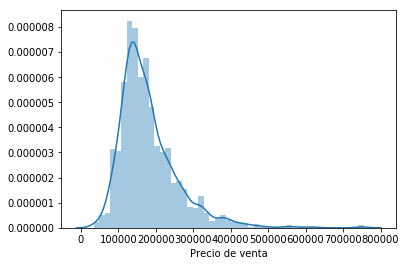

In [5]:

sns.distplot(train['Precio de venta']);


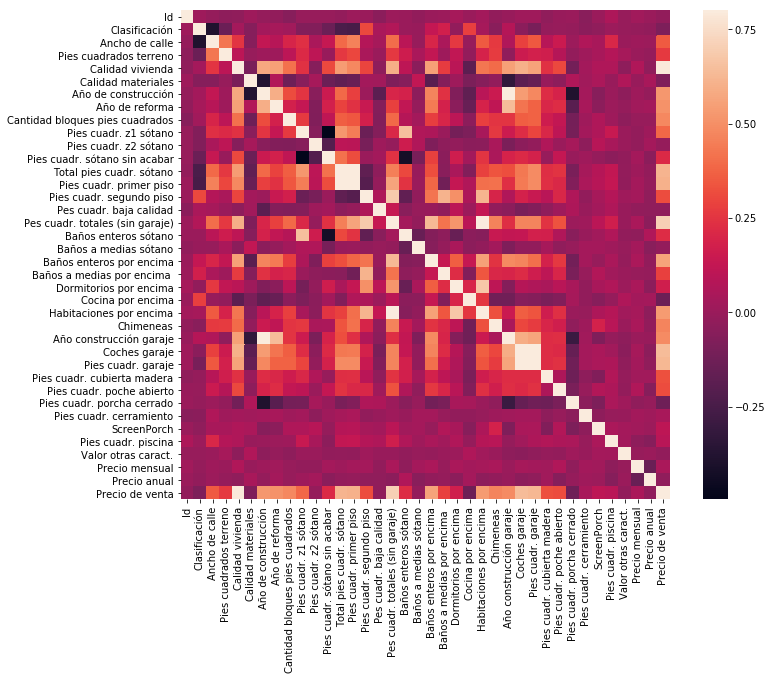

In [6]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [7]:
print("Skewness: %f" % train['Precio de venta'].skew())
print("Kurtosis: %f" % train['Precio de venta'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [8]:
#Numero de columnas
print("Tamaño del train.csv : {} ".format(train.shape))
print("Tamaño del test.csv: {} ".format(test.shape))

#Guardamos la columna de ID
train_ID = train['Id']
test_ID = test['Id']

#Borramos la columna id ya que no sirve para hacer predicciones
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#checkeamos el tamño tras quitar la columna ID
print("\nTamaño del train.csv tras borrar el ID : {} ".format(train.shape)) 
print("Tamaño del test.csv tras borrar el ID : {} ".format(test.shape))

Tamaño del train.csv : (1460, 81) 
Tamaño del test.csv: (1459, 80) 

Tamaño del train.csv tras borrar el ID : (1460, 80) 
Tamaño del test.csv tras borrar el ID : (1459, 79) 


In [9]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
Calidad y condición piscina,99.657417
Otras características,96.402878
Callejón,93.216855
Valla,80.438506
Total pies cuadr. garaje,50.051387
Total pies cuadr. sótano,49.982871
Precio de venta,49.982871
Calidad chimeneas,48.646797
Ancho de calle,16.649538
Año construcción garaje,5.447071


Text(0.5,1,'Percent missing data by feature')

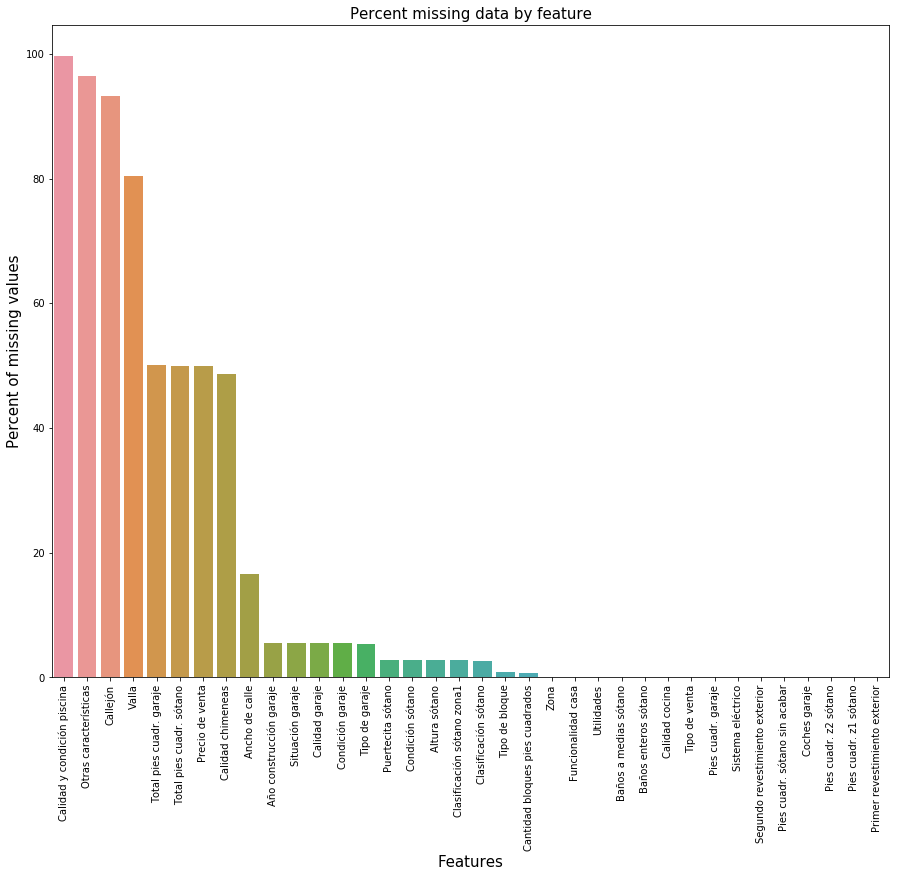

In [10]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [11]:
#NA significa sin piscina por lo que lo cambiamos por None
all_data["Calidad y condición piscina"] = all_data["Calidad y condición piscina"].fillna("None")

In [12]:
#NA significa que no tiene características extras por lo que lo cambiamos por None
all_data["Otras características"] = all_data["Otras características"].fillna("None")

In [13]:
#NA significa que no tiene acceso por callejon por lo que lo cambiamos por None
all_data["Callejón"] = all_data["Callejón"].fillna("None")

In [14]:
#NA significa que no tiene valla por lo que lo cambiamos por None
all_data["Valla"] = all_data["Valla"].fillna("None")

In [15]:
#NA significa que no tiene chimenea por lo que lo cambiamos por None
all_data["Calidad chimeneas"] = all_data["Calidad chimeneas"].fillna("None")

In [16]:
#No sabemos el dato, pero si que sabemos el ancho de la calle de otras casas del barrio, por lo que usaremos la mediana
#de ancho de la calle del barrio para estimar el ancho de la calle
all_data["Ancho de calle"] = all_data.groupby("Vecindario")["Ancho de calle"].transform(
    lambda x: x.fillna(x.median()))

In [17]:
for col in ('Tipo de garaje', 'Condición garaje', 'Calidad garaje', 'Situación garaje'):
    all_data[col] = all_data[col].fillna('None')

In [22]:
all_data[Puertecita sótano]

SyntaxError: invalid syntax (<ipython-input-22-ac1ddfe6b3dc>, line 1)

In [18]:
for col in ('Año construcción garaje', 'Total pies cuadr. garaje', 'Coches garaje'):
    all_data[col] = all_data[col].fillna(0)